In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

# download files needed for nltk
nltk.download('punkt')
nltk.download('stopwords')

tweets_csv = pd.read_csv("tweets.csv")

tweets = tweets_csv["text"]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
word_count = dict()

# Regex taken from
# https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression/8377440#8377440
def clean_tweet(tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

for index, tweet in tweets.iteritems():
    # No clue why, but this print statement has to be here or tweet.split() will throw an error
    # print(tweet)
    words = nltk.word_tokenize(clean_tweet(str(tweet).lower()))
    filtered_words = [word for word in words if not word.lower() in stopwords.words('english')]
    for word in filtered_words:
        if word in word_count:
            word_count[word] += 1
        else:
            word_count[word] = 1

In [4]:
filtered_count = {k:v for (k,v) in word_count.items() if len(k) > 2 and v >= 100}
sorted_count = sorted(filtered_count.items(), key=lambda x:x[1], reverse=True )

for key, count in sorted_count:
    print(key + " " + str(count))

trump 28626
n't 13953
clinton 11983
hillary 11234
amp 9835
obama 9133
people 6694
... 5468
like 5461
new 5286
get 4921
donald 4883
one 4698
news 4672
via 4261
politics 4227
tcot 3912
america 3769
https 3584
president 3531
would 3394
're 3317
black 3304
time 3226
know 3202
make 3120
day 3098
says 3092
vote 3085
want 3028
never 2876
pjnet 2833
love 2829
maga 2805
election 2794
think 2708
media 2701
right 2652
white 2624
good 2611
campaign 2536
see 2535
video 2531
need 2525
say 2428
man 2413
gop 2397
world 2369
let 2361
back 2305
american 2259
going 2181
today 2144
great 2087
got 2078
stop 2055
take 2055
watch 2040
still 2008
first 2001
life 1987
could 1978
women 1938
really 1904
police 1896
country 1895
said 1838
every 1828
bill 1769
even 1739
support 1699
'll 1689
show 1688
house 1664
way 1658
years 1655
real 1638
https… 1625
post 1621
much 1618
god 1609
ccot 1603
http… 1575
state 1574
isis 1573
look 1564
best 1542
live 1516
ever 1505
debate 1492
last 1484
breaking 1480
must 1462
've 14

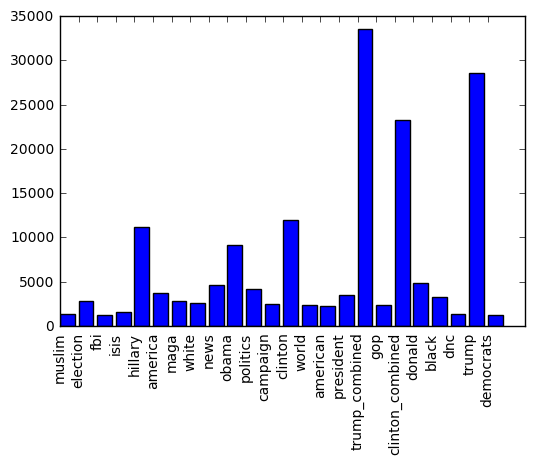

In [5]:
selected = {
    'trump' : filtered_count["trump"],
    'clinton' : filtered_count["clinton"],
    'hillary' : filtered_count["hillary"],
    'obama': filtered_count["obama"],
    'donald': filtered_count["donald"],
    'politics': filtered_count["politics"],
    'news': filtered_count["news"],
    'america': filtered_count["america"],
    'president': filtered_count["president"],
    'black': filtered_count["black"],
    'election': filtered_count["election"],
    'gop': filtered_count["gop"],
    'maga': filtered_count["maga"],
    'campaign': filtered_count["campaign"],
    'world': filtered_count["world"],
    'white': filtered_count["white"],
    'american': filtered_count["american"],
    'dnc': filtered_count["dnc"],
    'muslim': filtered_count["muslim"],
    'fbi': filtered_count["fbi"],
    'democrats': filtered_count["democrats"],
    'isis': filtered_count["isis"],
    'clinton_combined':filtered_count["hillary"] + filtered_count["clinton"],
    'trump_combined': filtered_count["trump"] + filtered_count["donald"]
}

plt.bar(range(len(selected)), selected.values())
plt.xticks(range(len(selected)), selected.keys(), rotation="vertical")
plt.show()

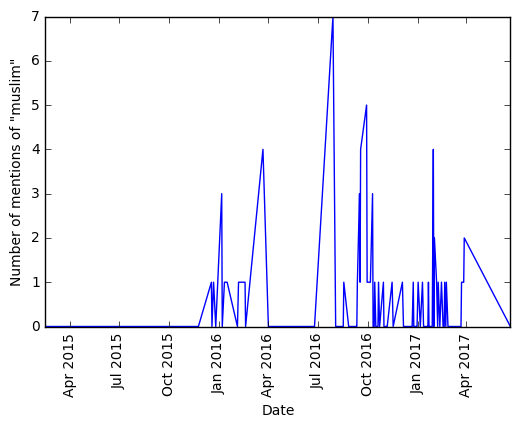

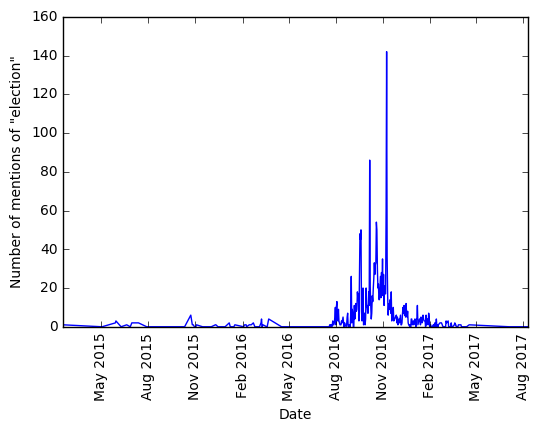

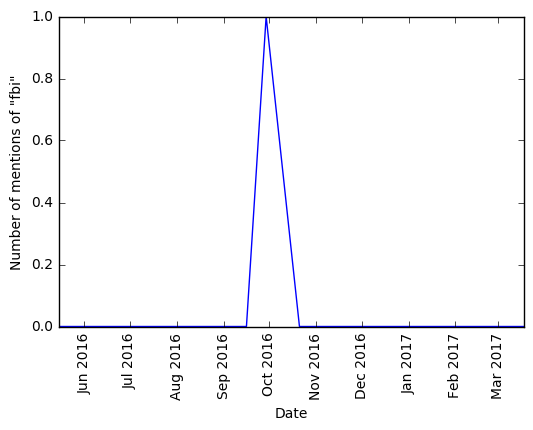

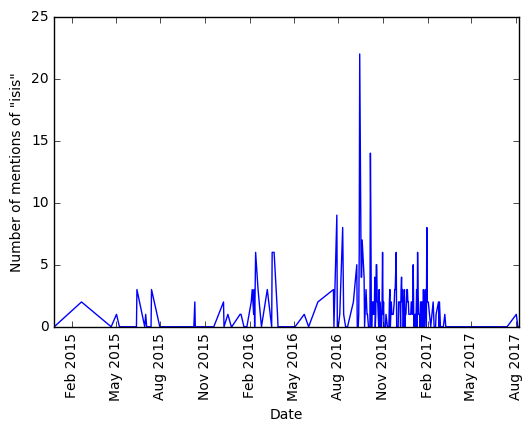

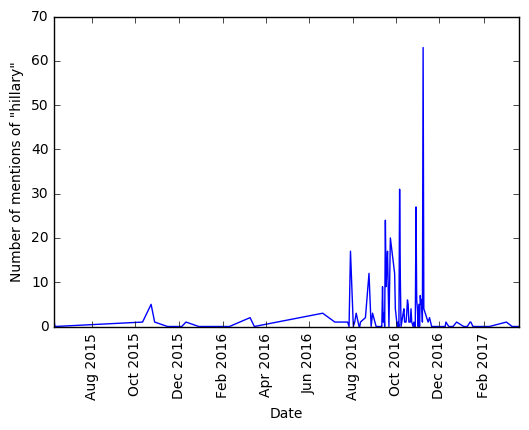

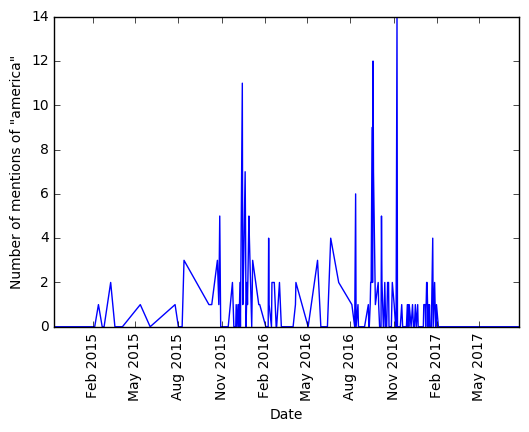

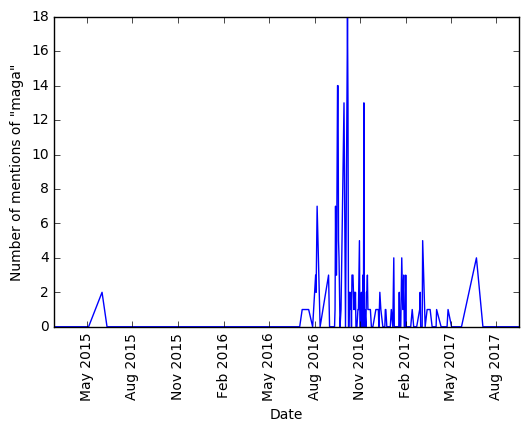

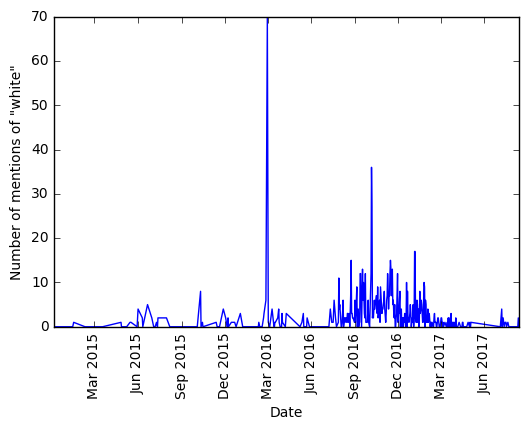

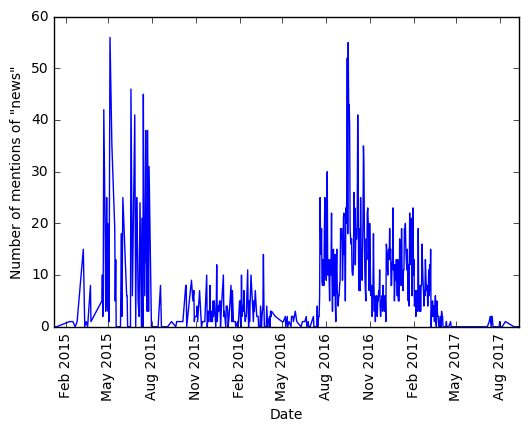

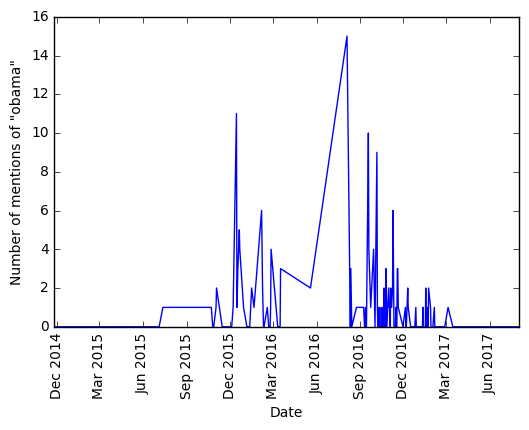

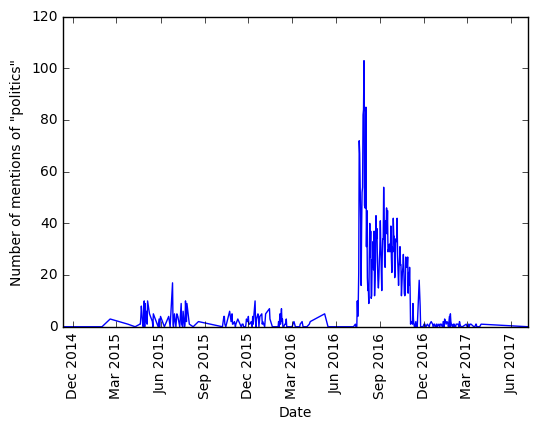

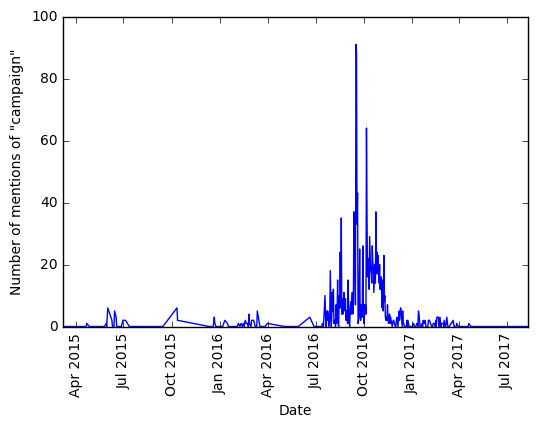

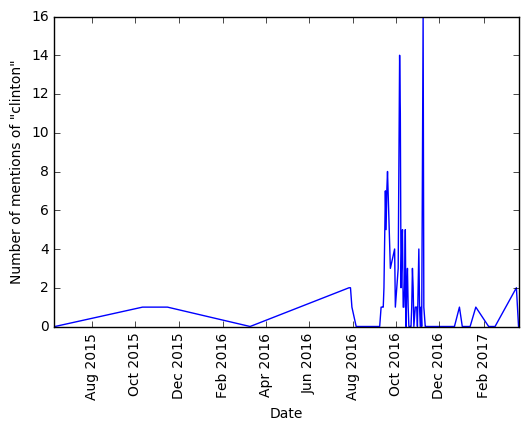

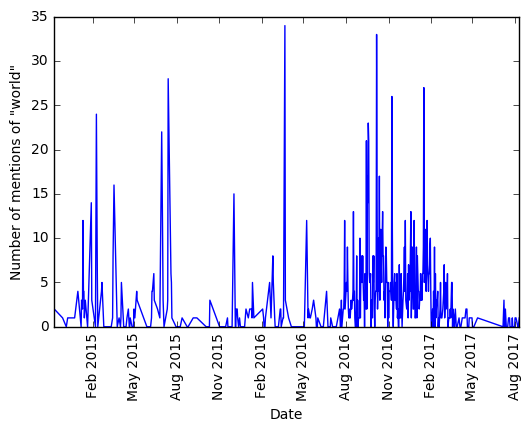

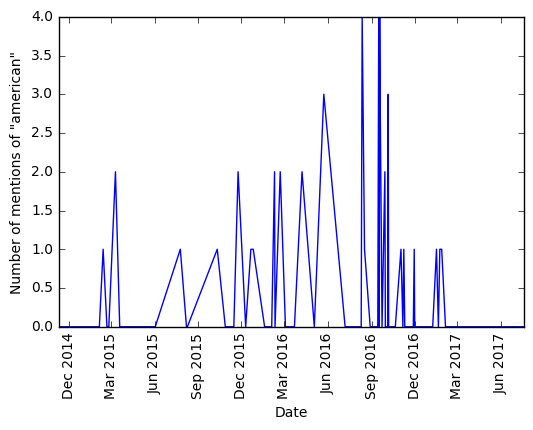

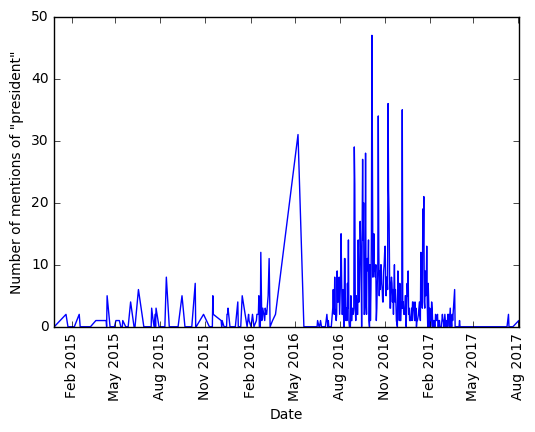

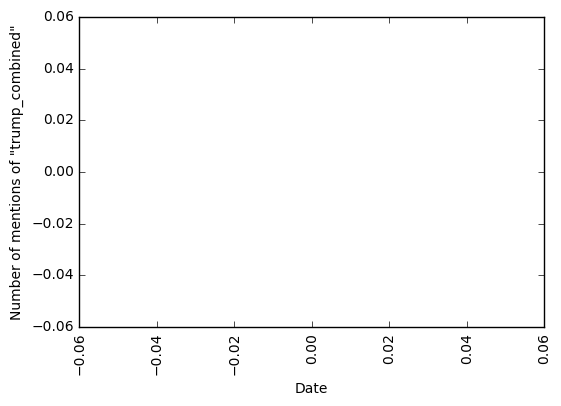

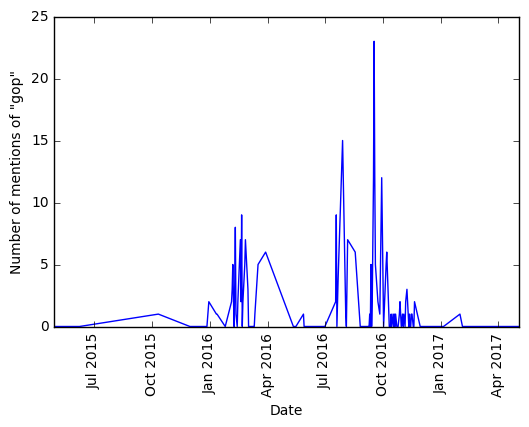

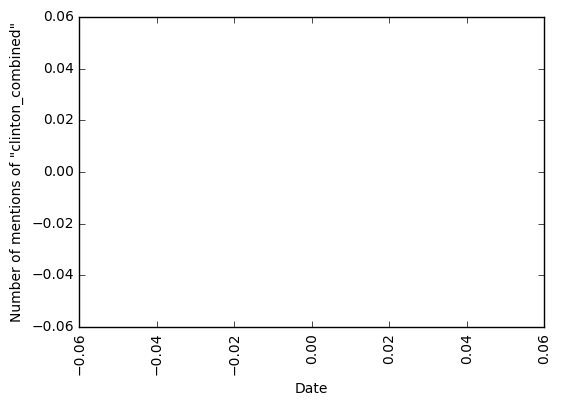

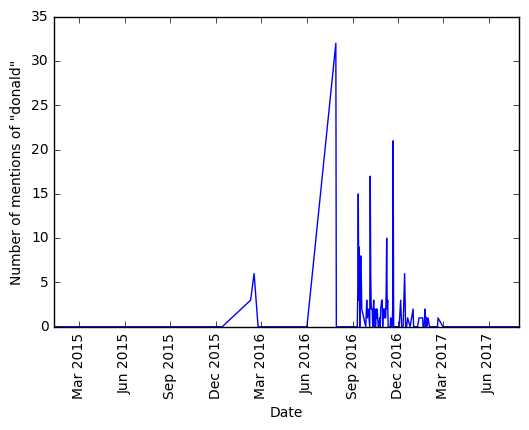

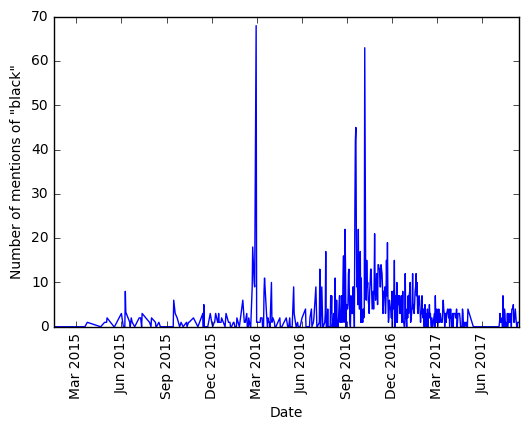

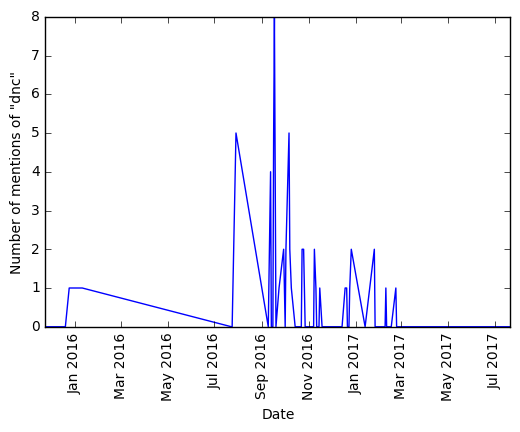

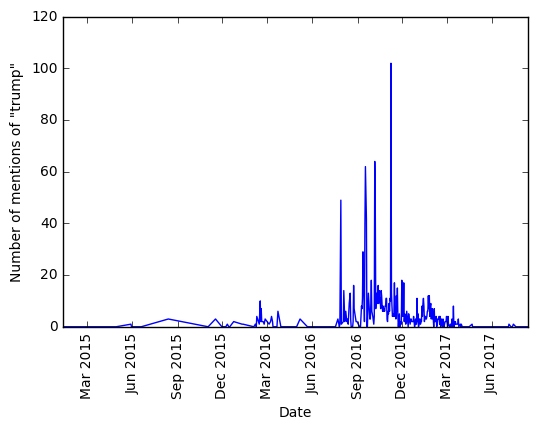

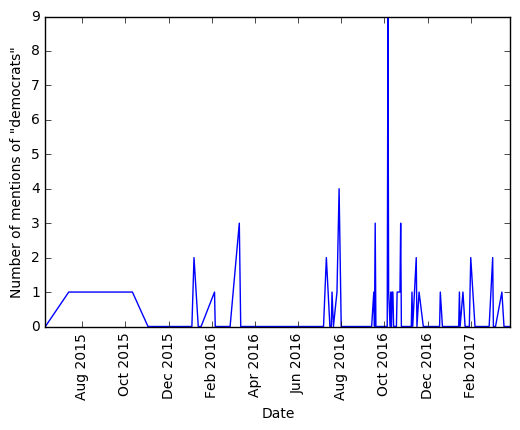

In [6]:
import datetime

def GetDates(word):
    datesFrame = tweets_csv[tweets_csv['text'].str.contains(word) == True]

    dateCount = dict()

    for index, date in datesFrame['created_str'].iteritems():
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
    
        if (sdate in dateCount):
            dateCount[sdate] += 1
        else:
            dateCount[sdate] = 0
        
    orderDateCount = sorted(dateCount.items(), key=lambda x:x[0], reverse=True)
    return orderDateCount

def PlotMentions(dates, word):
    x_val = [x[0] for x in dates]
    y_val = [x[1] for x in dates]
    
    plt.plot(x_val, y_val)
    plt.xticks(rotation=90)
    plt.ylabel("Number of mentions of \"" + word + "\"")
    plt.xlabel("Date")
    plt.show()
    
for word in selected.keys():
    PlotMentions(GetDates(word), word)

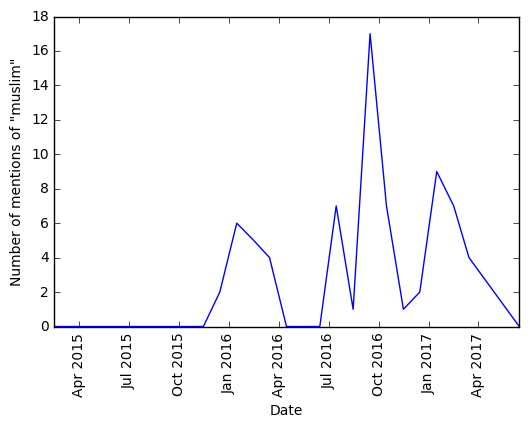

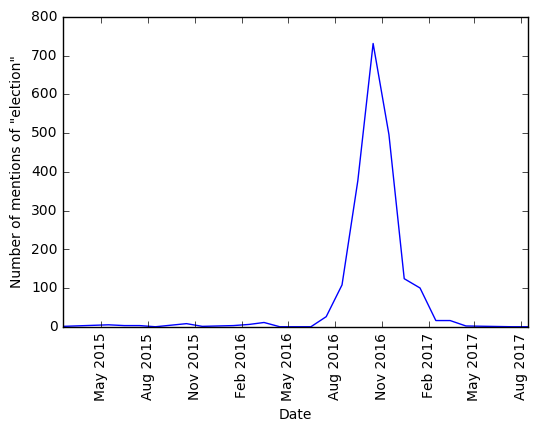

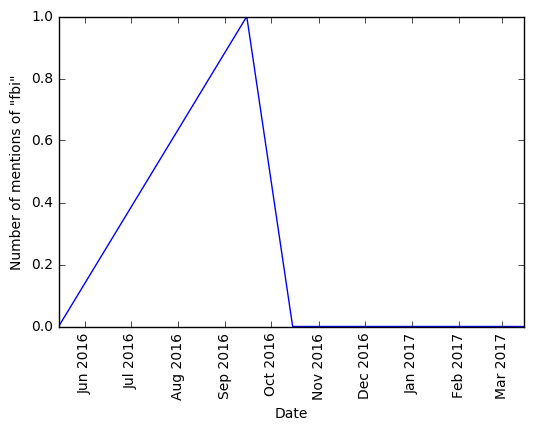

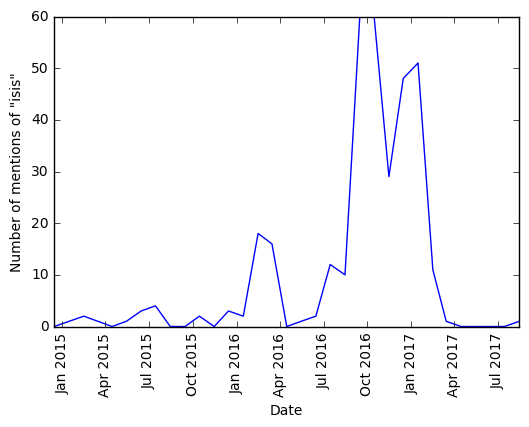

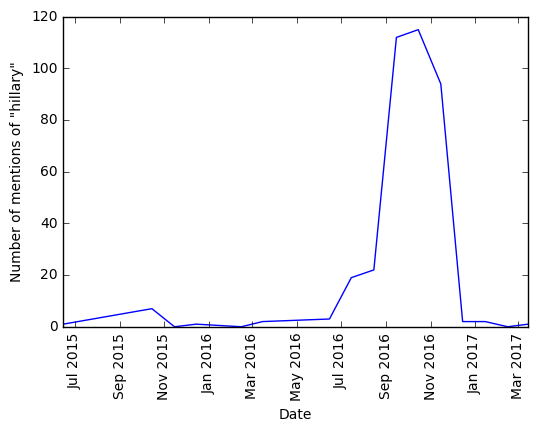

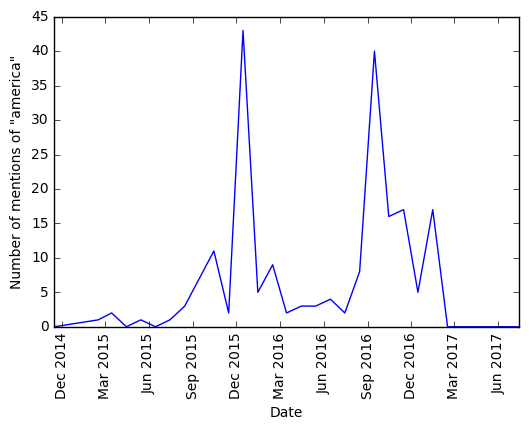

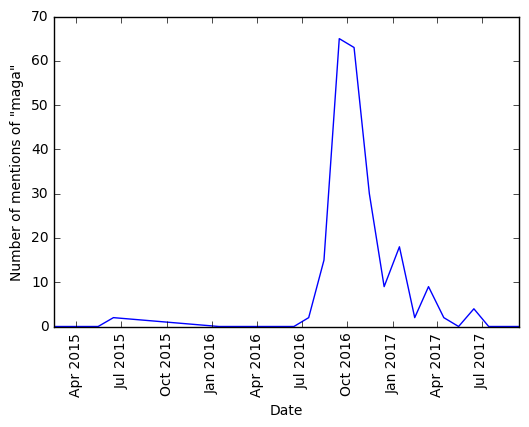

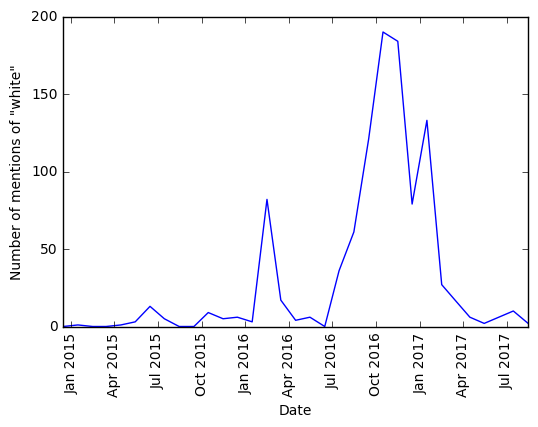

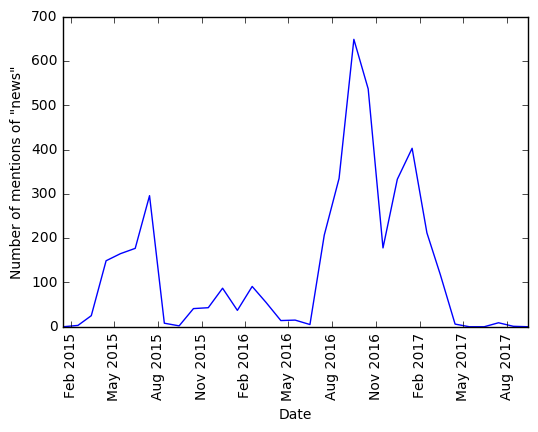

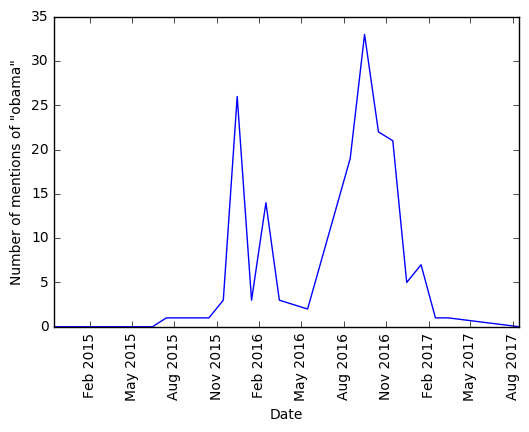

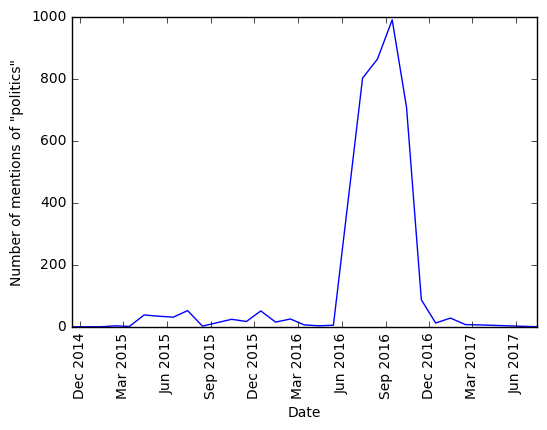

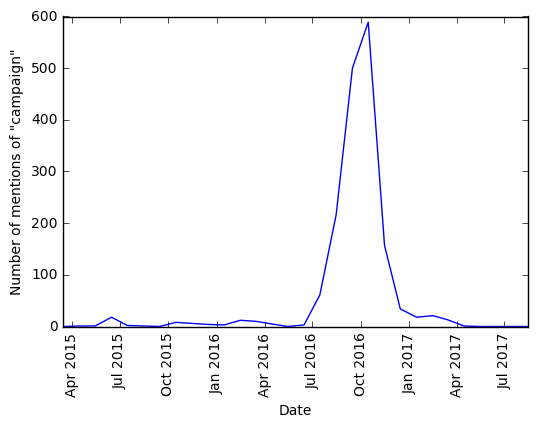

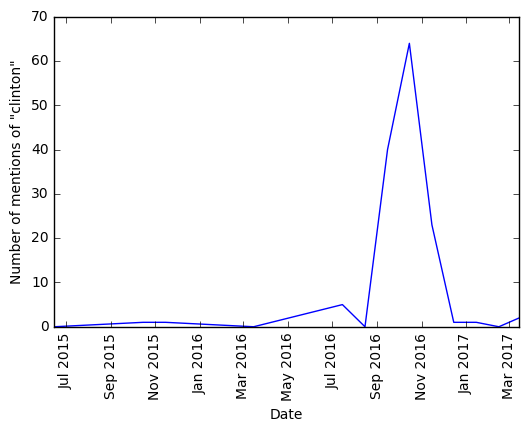

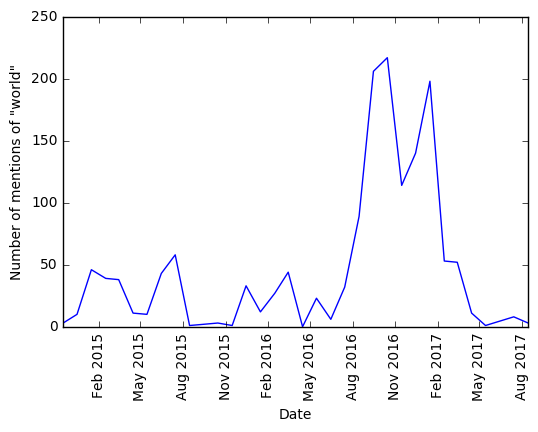

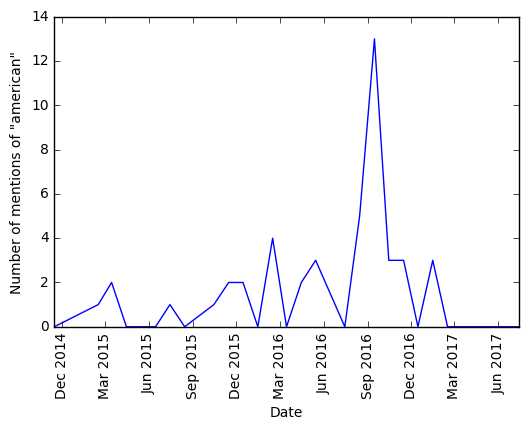

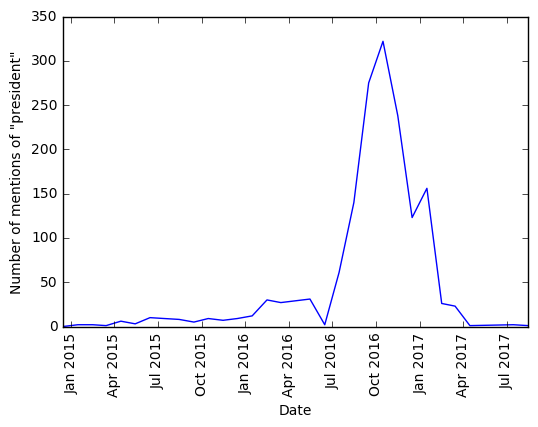

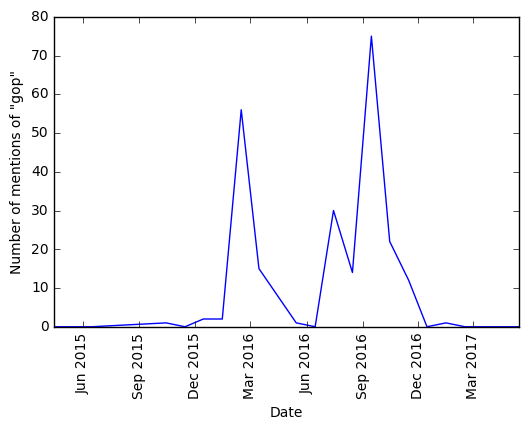

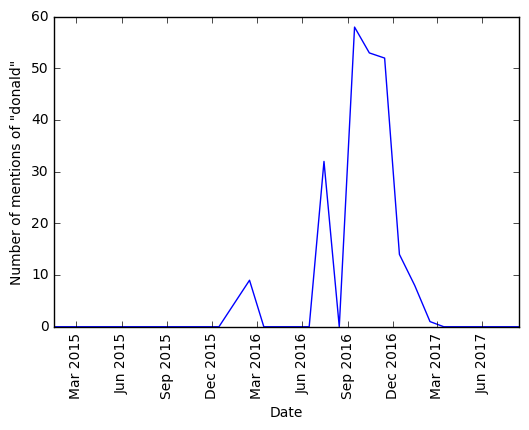

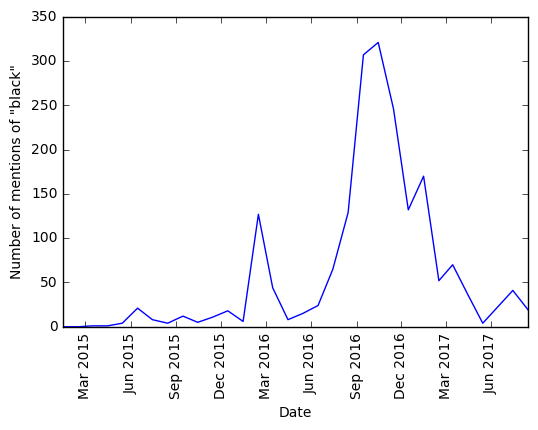

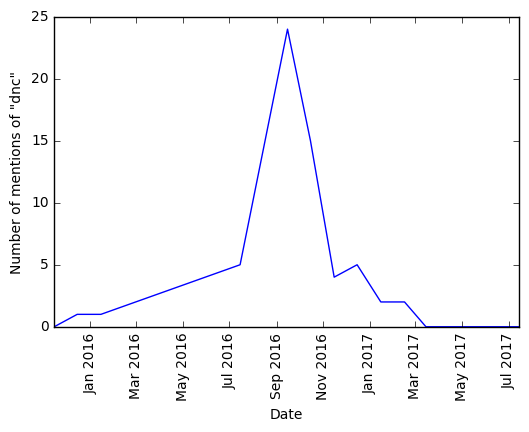

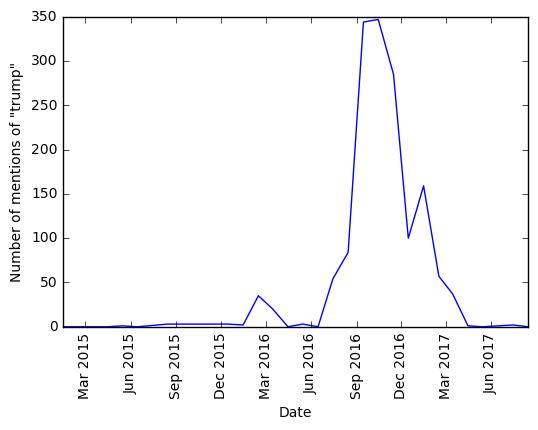

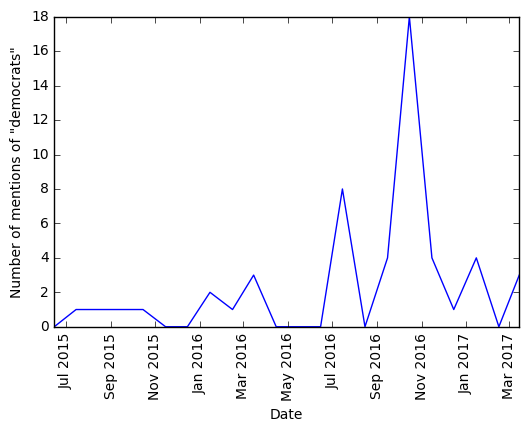

In [7]:
def PlotMentionsByMonth(dates, word):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    if (len(dates) > 0):
        hist = dict()
    
        for date in dates:
            #print(date)
            year = date[0].year
            month = date[0].month
            day = 15
            
            if datetime.date(year, month, day) in hist:
                hist[datetime.date(year, month, day)] += date[1]
            else:
                hist[datetime.date(year, month, day)] = date[1]
        
        orderDateCount = sorted(hist.items(), key=lambda x:x[0], reverse=True)
        
        x_val = [x[0] for x in orderDateCount]
        y_val = [x[1] for x in orderDateCount]
        
        plt.plot(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel("Number of mentions of \"" + word + "\"")
        plt.xlabel("Date")
        plt.show()
    
for word in selected.keys():
    PlotMentionsByMonth(GetDates(word), word)

Mean: 0.0424554264077 mode: 0.0 variance: 0.0922380852631
Percent positive: 0.3163841807909605 Percent negative: 0.192090395480226 Percent Neutral: 0.4915254237288136


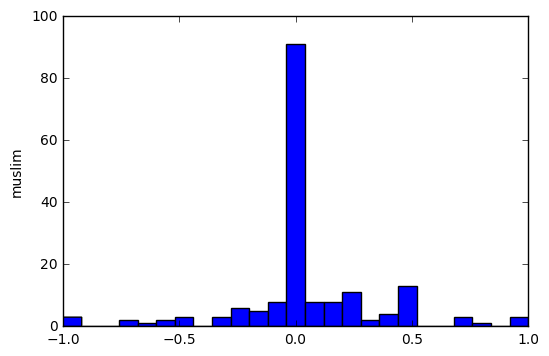

Mean: 0.0523797821638 mode: 0.0 variance: 0.0785250174084
Percent positive: 0.33105218135158254 Percent negative: 0.18562874251497005 Percent Neutral: 0.4833190761334474


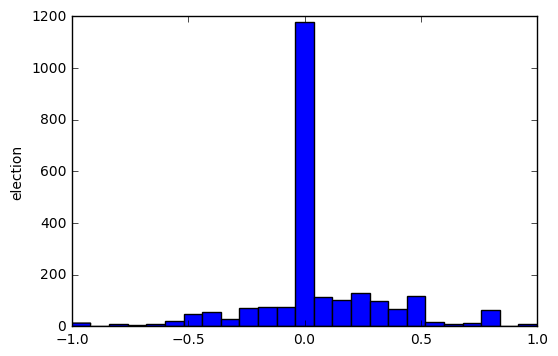

Mean: 0.024358974359 mode: 0.0 variance: 0.00712031558185
Percent positive: 0.07692307692307693 Percent negative: 0.0 Percent Neutral: 0.9230769230769231


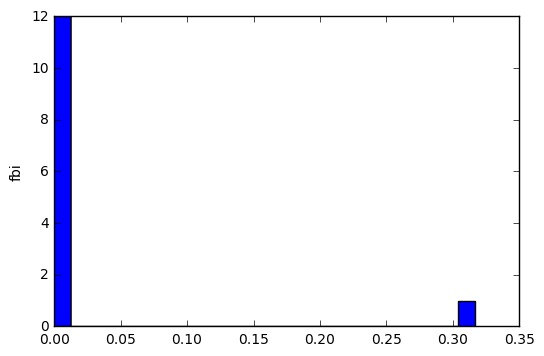

Mean: 0.0062841403404 mode: 0.0 variance: 0.0428400985191
Percent positive: 0.16515426497277677 Percent negative: 0.10163339382940109 Percent Neutral: 0.7332123411978222


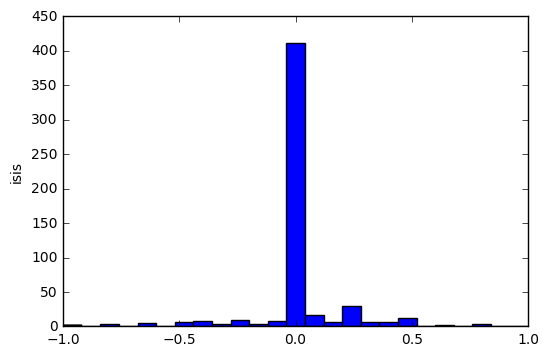

Mean: -0.00422517261831 mode: 0.0 variance: 0.0606854579727
Percent positive: 0.1748971193415638 Percent negative: 0.17695473251028807 Percent Neutral: 0.6481481481481481


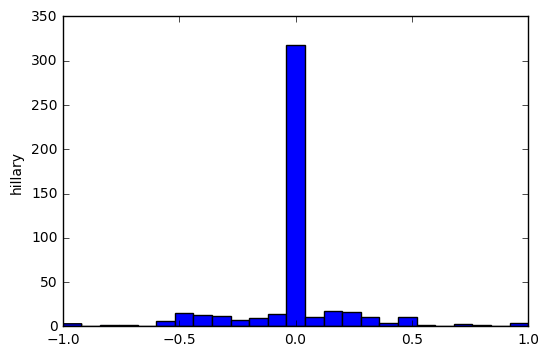

Mean: 0.0459881973109 mode: 0.0 variance: 0.0794671287446
Percent positive: 0.2739018087855297 Percent negative: 0.1421188630490956 Percent Neutral: 0.5839793281653747


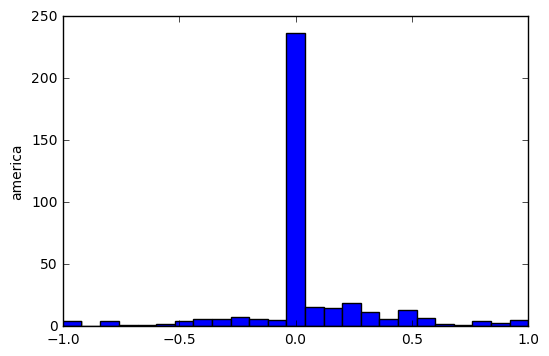

Mean: 0.0241295414251 mode: 0.0 variance: 0.0708899156148
Percent positive: 0.26649076517150394 Percent negative: 0.20580474934036938 Percent Neutral: 0.5277044854881267


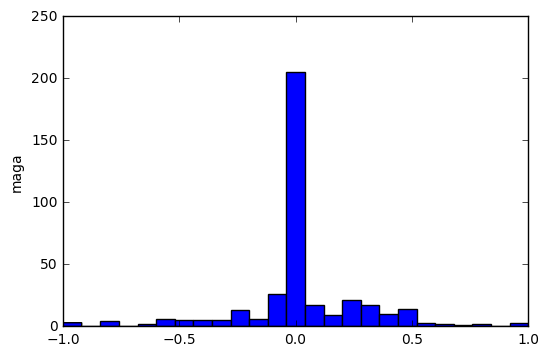

Mean: 0.0244202947387 mode: 0.0 variance: 0.0320775680555
Percent positive: 0.3477633477633478 Percent negative: 0.2756132756132756 Percent Neutral: 0.37662337662337664


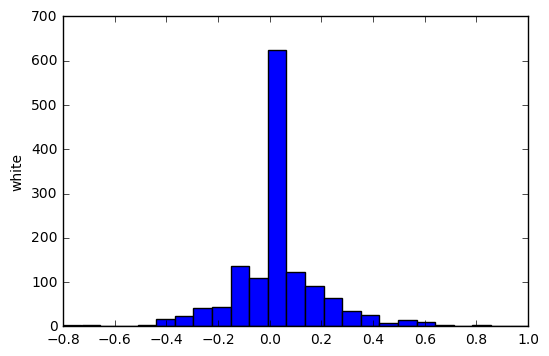

Mean: 0.0266084617266 mode: 0.0 variance: 0.0730671868862
Percent positive: 0.2668503603221704 Percent negative: 0.20072064434082237 Percent Neutral: 0.5324289953370072


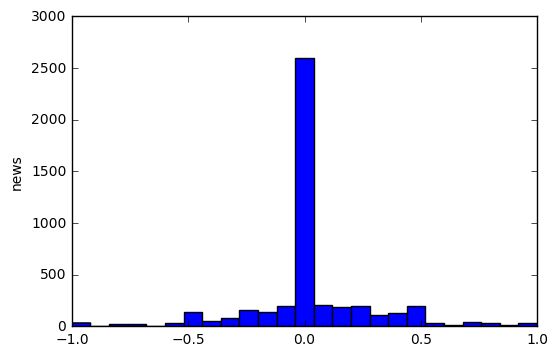

Mean: -0.00132873464184 mode: 0.0 variance: 0.0760139694051
Percent positive: 0.20388349514563106 Percent negative: 0.22330097087378642 Percent Neutral: 0.5728155339805825


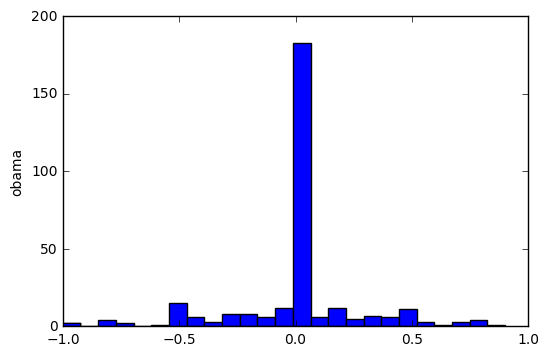

Mean: 0.0310977318761 mode: 0.0 variance: 0.0552529313917
Percent positive: 0.23747591522157996 Percent negative: 0.14836223506743737 Percent Neutral: 0.6141618497109826


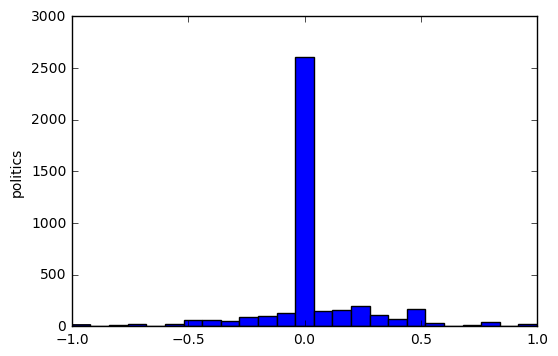

Mean: 0.0354880724736 mode: 0.0 variance: 0.0560913682928
Percent positive: 0.2840565085771948 Percent negative: 0.17406659939455096 Percent Neutral: 0.5418768920282543


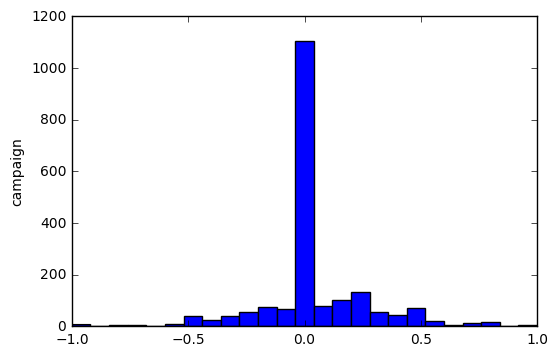

Mean: -0.00768802820805 mode: 0.0 variance: 0.075241245018
Percent positive: 0.20833333333333334 Percent negative: 0.19444444444444445 Percent Neutral: 0.5972222222222222


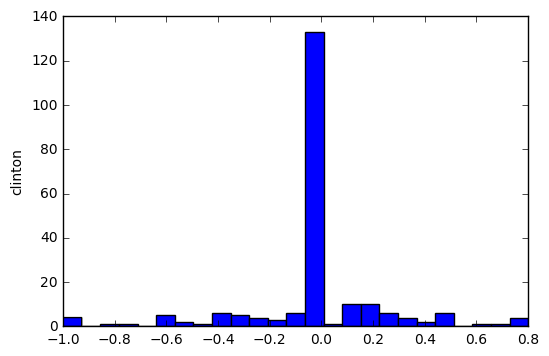

Mean: 0.0637574904281 mode: 0.0 variance: 0.0943505806772
Percent positive: 0.3768996960486322 Percent negative: 0.19959473150962512 Percent Neutral: 0.42350557244174264


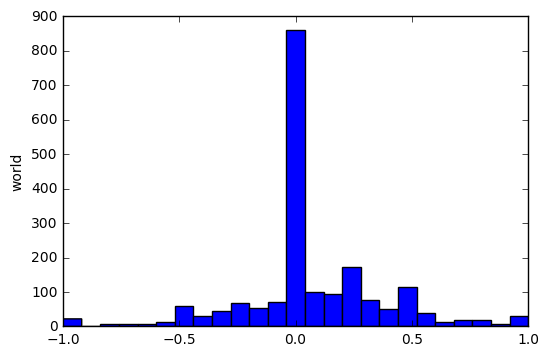

Mean: 0.060812021312 mode: 0.0 variance: 0.0845801055863
Percent positive: 0.35384615384615387 Percent negative: 0.2153846153846154 Percent Neutral: 0.4307692307692308


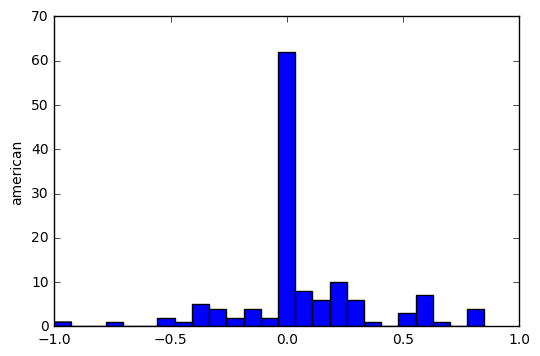

Mean: 0.0676199362206 mode: 0.0 variance: 0.0864117712564
Percent positive: 0.35064935064935066 Percent negative: 0.16883116883116883 Percent Neutral: 0.4805194805194805


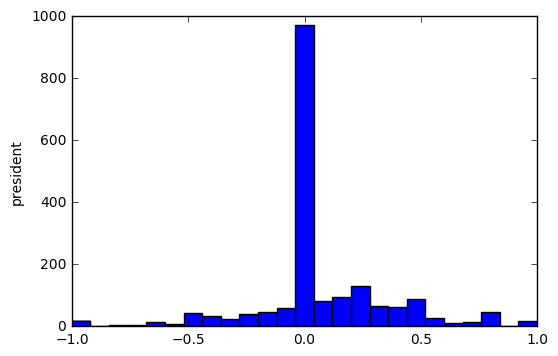

Mean: 0.00381809076173 mode: 0.0 variance: 0.0566726381309
Percent positive: 0.23699421965317918 Percent negative: 0.20520231213872833 Percent Neutral: 0.5578034682080925


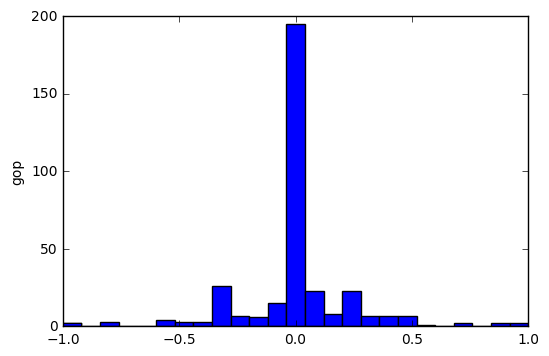

Mean: -0.0122650852409 mode: 0.0 variance: 0.0625534941935
Percent positive: 0.21022727272727273 Percent negative: 0.3181818181818182 Percent Neutral: 0.4715909090909091


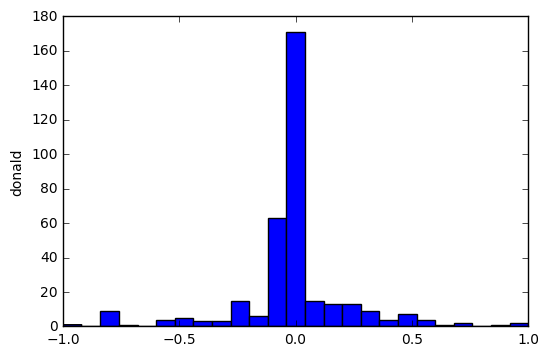

Mean: -0.0254851305585 mode: 0.0 variance: 0.0512105164933
Percent positive: 0.2788542544229149 Percent negative: 0.504212299915754 Percent Neutral: 0.21693344566133108


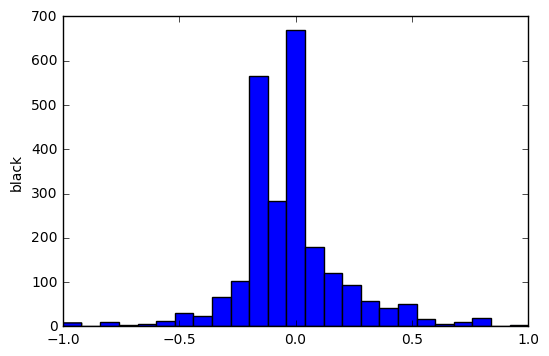

Mean: 0.0544479496075 mode: 0.0 variance: 0.0729671288923
Percent positive: 0.2907801418439716 Percent negative: 0.14893617021276595 Percent Neutral: 0.5602836879432624


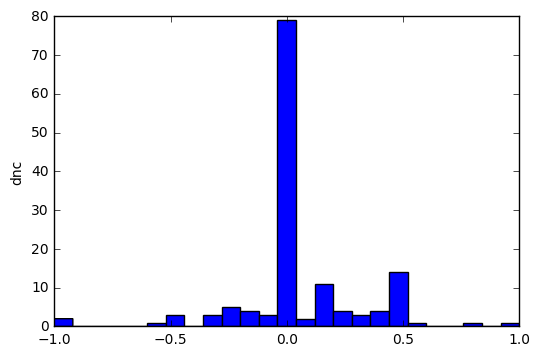

Mean: 0.0314469217283 mode: 0.0 variance: 0.0823674890735
Percent positive: 0.27595628415300544 Percent negative: 0.21256830601092896 Percent Neutral: 0.5114754098360655


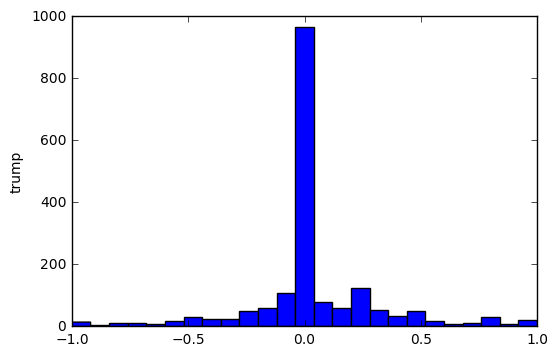

Mean: 0.0263831022863 mode: 0.0 variance: 0.100318591165
Percent positive: 0.3179190751445087 Percent negative: 0.24277456647398843 Percent Neutral: 0.4393063583815029


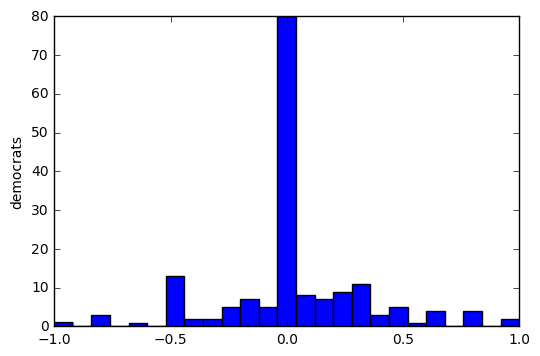

In [8]:
from textblob import TextBlob
from scipy.stats import mode
                               
def sentiment(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(clean_tweet(tweet))
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def Percentages(sentiments):
    percentPositive = 0
    percentNegative = 0
    percentNeutral = 0
    
    for sentiment in sentiments:
        if sentiment > 0:
            percentPositive += 1
        elif sentiment < 0:
            percentNegative += 1
        else:
            percentNeutral += 1
            
    return percentPositive / len(sentiments), percentNegative / len(sentiments), percentNeutral / len(sentiments)

def PlotSentiment(word):
    sent = sentiment(word)
    if (len(sent) != 0):
        percentPositive, percentNegative, percentNeutral = Percentages(sent)
        print("Mean: " + str(np.mean(sent)) + " mode: " + str(mode(sent)[0][0]) + " variance: " + str(np.var(sent)))
        print("Percent positive: " +str(percentPositive) +
              " Percent negative: " + str(percentNegative) + " Percent Neutral: " + str(percentNeutral))
        plt.hist(sent, bins=25)
        plt.ylabel(word)
        plt.show()

for word in selected:
    PlotSentiment(word)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     5.887
Date:                Mon, 30 Apr 2018   Prob (F-statistic):             0.0170
Time:                        11:13:23   Log-Likelihood:                -10.365
No. Observations:                 105   AIC:                             24.73
Df Residuals:                     103   BIC:                             30.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1975      0.099     -1.994      0.0

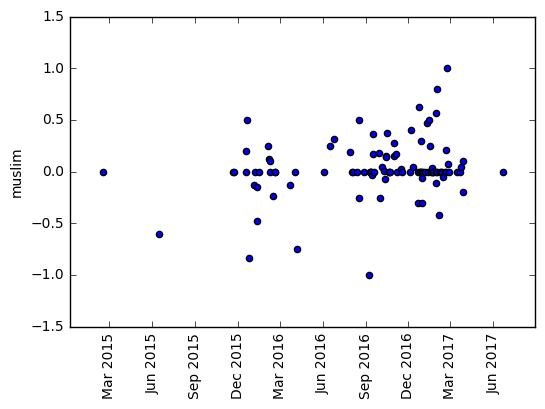

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.869
Date:                Mon, 30 Apr 2018   Prob (F-statistic):            0.00536
Time:                        11:13:31   Log-Likelihood:                 38.941
No. Observations:                 299   AIC:                            -73.88
Df Residuals:                     297   BIC:                            -66.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1851      0.045      4.134      0.0

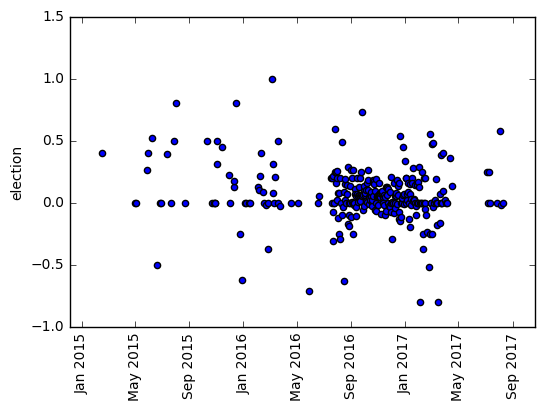

C:\Users\Chris\Anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     7.502
Date:                Mon, 30 Apr 2018   Prob (F-statistic):             0.0209
Time:                        11:13:40   Log-Likelihood:                 15.562
No. Observations:                  12   AIC:                            -27.12
Df Residuals:                      10   BIC:                            -26.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1508      0.050      3.016      0.0

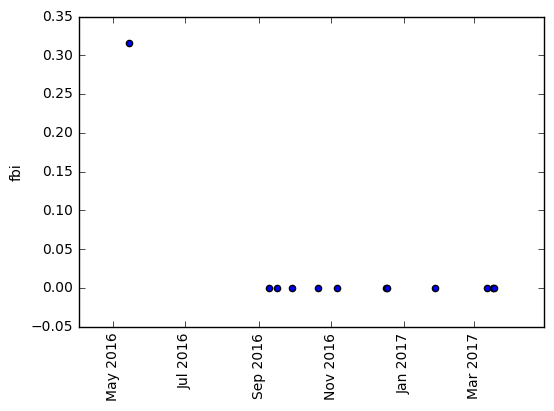

Mean: 0.00825699397337 variance: 0.0369240334967


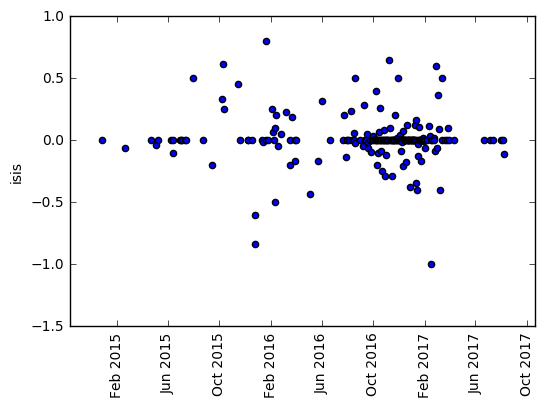

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.810
Date:                Mon, 30 Apr 2018   Prob (F-statistic):             0.0967
Time:                        11:13:44   Log-Likelihood:                 32.351
No. Observations:                 105   AIC:                            -60.70
Df Residuals:                     103   BIC:                            -55.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0904      0.066     -1.361      0.1

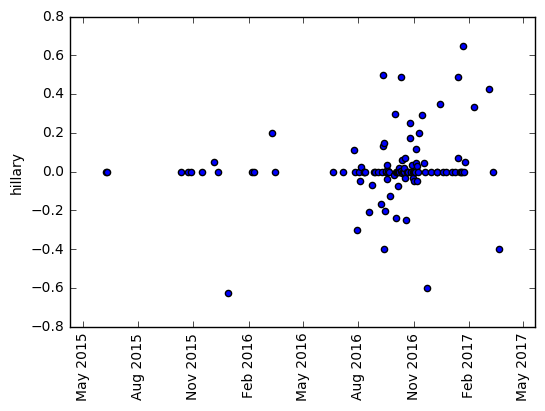

Mean: 0.0392896217823 variance: 0.0745464528508


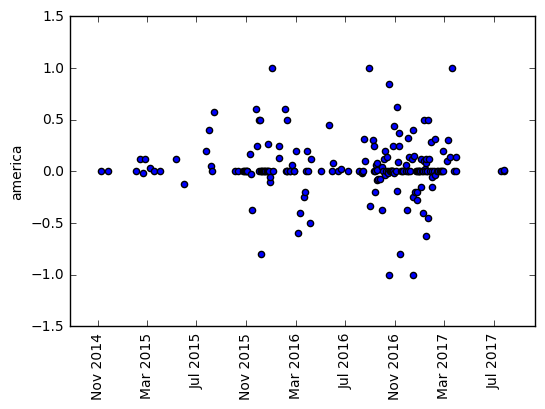

Mean: 0.0369878751621 variance: 0.0549968496103


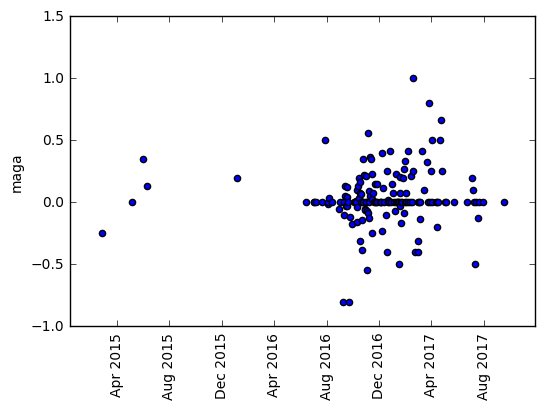

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     11.63
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           0.000721
Time:                        11:13:55   Log-Likelihood:                 217.87
No. Observations:                 363   AIC:                            -431.7
Df Residuals:                     361   BIC:                            -423.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0949      0.023      4.084      0.0

In [ ]:
from statsmodels.regression.linear_model import OLS

def sentiment(word, df):
    tweets = df[df['text'].str.contains(word) == True]
                               
    sentiment = list()
                               
    for index, tweet in tweets['text'].iteritems():
        analysis = TextBlob(tweet)
        sentiment.append(analysis.sentiment.polarity)
    
    return sentiment

def SentimentWithTime(word):
    tweets = tweets_csv[tweets_csv['text'].str.contains(word) == True]
    
    sent = dict()
    
    for index, date in tweets['created_str'].iteritems():
        sameDate = tweets[tweets['created_str'].str[0:10] ==(date[0:10])]
        slist = date[0:10].split('-')
        sdate = datetime.date(int(slist[0]), int(slist[1]), int(slist[2]))
        if (sdate not in sent):
            sent[sdate] = np.mean(sentiment(word, sameDate))
    
    return sent

def PlotSentimentWithTime(word):
    sent = SentimentWithTime(word)
    
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(sent) != 0):
        x_val = [x[0] for x in ordered_sent]
        y_val = [x[1] for x in ordered_sent]
        print("Mean: " + str(np.mean(y_val)) + " variance: " + str(np.var(y_val)))
        plt.scatter(x_val, y_val)
        plt.xticks(rotation=90)
        plt.ylabel(word)
        plt.show()
        
def RegressWord(word):
    sent = SentimentWithTime(word)
    ordered_sent = sorted(sent.items(), key=lambda x:x[0], reverse=False)
    
    if (len(ordered_sent) > 0):
        time0 = ordered_sent[0][0]
    
        X = np.ones(shape=(len(ordered_sent), 2))
        for i in range(0, len(ordered_sent)):
            X[i, 1] = (ordered_sent[i][0] - time0).days
        
        y = np.array([x[1] for x in ordered_sent])
    
        model = OLS(y, X)
        fit = model.fit()
        if (fit.rsquared > 0.01):
            print(fit.summary())

for word in selected:
    RegressWord(word)
    PlotSentimentWithTime(word)